# Trações e potências

0.01734754068408905


C:\Users\arthu\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\arthu\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


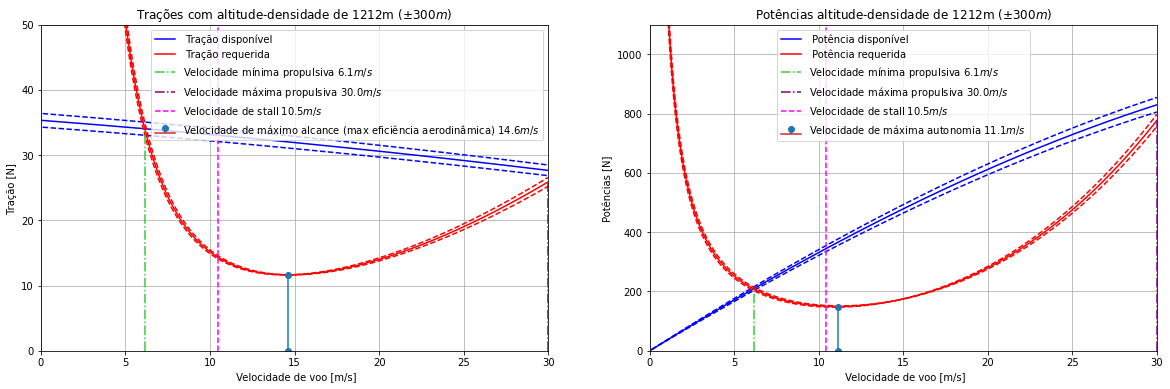

In [7]:
"""
Created on Tue Apr  6 15:37:52 2021

@author: Arthur Chabole
=========================================
Este programa calcula as trações, potências diponíveis e requeridas.

figura 1 - Trações diponível e requeridas
            - Fixo 1212m variando + - 300m
            - Mostrando a velocidade min, max, stall e max alcance.

figura 2 - Potência diponível e requeridas
            - Fixo 1212m variando + - 300m
            - Mostrando a velocidade min, max, stall e max autonomia.
"""
from ZebraLib.zebralib.zebraperformance import Airplane # Só a classe
from ZebraLib.zebralib.zebraperformance import *        # Tudo
from ZebraLib.zebralib import zebraperformance as zp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Zb = Airplane(S=0.938, Af=0.8, CLmax= 1.523, CLn=1.061, Swet=7) 

#mais elementos melhor para o método find_match
V = np.linspace(0.1, 30, 1000)
rho = np.array( (1.1212, 1.0886542, 1.05678))
    
Trac_Av0 = Zb.trac_Available(V, rho[0])
Trac_Av1 = Zb.trac_Available(V, rho[1])
Trac_Av2 = Zb.trac_Available(V, rho[2])

Trac_Req0 = Zb.trac_Req(V, rho[0])
Trac_Req1 = Zb.trac_Req(V, rho[1])
Trac_Req2 = Zb.trac_Req(V, rho[2])

pot_Av0 = Zb.pot_Available(V, rho[0])
pot_Av1 = Zb.pot_Available(V, rho[1])
pot_Av2 = Zb.pot_Available(V, rho[2])

pot_Req0 = Zb.pot_Req(V, rho[0])
pot_Req1 = Zb.pot_Req(V, rho[1])
pot_Req2 = Zb.pot_Req(V, rho[2])

# ==========================================     FIGURA 1      ==============================================

fig, ax = plt.subplots(figsize=(20, 6),nrows=1, ncols=2)

ax[0].set(title=f'Trações com altitude-densidade de {round(zp.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Tração [N] ')

ax[0].plot(V, Trac_Av0, 'b--')
ax[0].plot(V, Trac_Av1, color= 'b', label= ' Tração disponível ')
ax[0].plot(V, Trac_Av2, 'b--')

ax[0].plot(V, Trac_Req0, 'r--')
ax[0].plot(V, Trac_Req1, color= 'r',label= ' Tração requerida ')
ax[0].plot(V, Trac_Req2, 'r--')

#Maximos e mínimos de velocidade + velocidade de stall e máx efic aerod
#Gambiarra Pensar um jeito mais simples e inteligente de fazer isso
Vmin_index, Vmax_index = zp.find_Match(Zb.trac_Available(V, rho[1]), Zb.trac_Req(V, rho[1]))

ax[0].plot([V[Vmin_index]]*2, [0, Trac_Req1[Vmin_index]] , 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax[0].plot([V[Vmax_index]]*2,[0, Trac_Req1[Vmax_index]] , 
        linestyle='dashdot', color='purple', 
        label= f'Velocidade máxima propulsiva ${round(V[Vmax_index],1)}m/s$')

ax[0].plot([Zb.Vstall]*2, [0, 50], linestyle='--',
        color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

Maxalc_index = np.where(Trac_Req1 == min(Trac_Req1))

ax[0].stem([V[Maxalc_index]]*2, [0, Trac_Req1[Maxalc_index]], 
        label=f'Velocidade de máximo alcance (max eficiência aerodinâmica) ${round(min(V[Maxalc_index]),1)}m/s$') 
 
ax[0].set_ylim(0,50)
ax[0].set_xlim(0,30)

ax[0].legend()
ax[0].grid()

# =====================================     FIGURA 2      ==============================================

#fig, ax2 = plt.subplots()

ax[1].set(title=f'Potências altitude-densidade de {round(zp.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Potências [N] ')

ax[1].plot(V, pot_Av0, 'b--')
ax[1].plot(V, pot_Av1, color= 'b', label= ' Potência disponível ')
ax[1].plot(V, pot_Av2, 'b--')

ax[1].plot(V, pot_Req0, 'r--')
ax[1].plot(V, pot_Req1, color= 'r',label= ' Potência requerida ')
ax[1].plot(V, pot_Req2, 'r--')

ax[1].plot([V[Vmin_index]]*2,[0, pot_Req1[Vmin_index]] , 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax[1].plot([V[Vmax_index]]*2, [0, pot_Req1[Vmax_index]] , 
        linestyle='dashdot', color='purple',
        label= f'Velocidade máxima propulsiva ${round(V[Vmax_index],1)}m/s$')

ax[1].plot([Zb.Vstall]*2, [0, 1100], linestyle='--', color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

MaxAuto_index = np.where(pot_Req1 == min(pot_Req1))

ax[1].stem([V[MaxAuto_index]]*2, [0, pot_Req1[MaxAuto_index]], 
        label=f'Velocidade de máxima autonomia ${round(min(V[MaxAuto_index]),1)}m/s$') 
 
ax[1].set_ylim(0,1100)
ax[1].set_xlim(0,30)

ax[1].legend()
ax[1].grid()

# Decolagem

## Dinâmica e cinemática


0.01734754068408905
0.01734754068408905


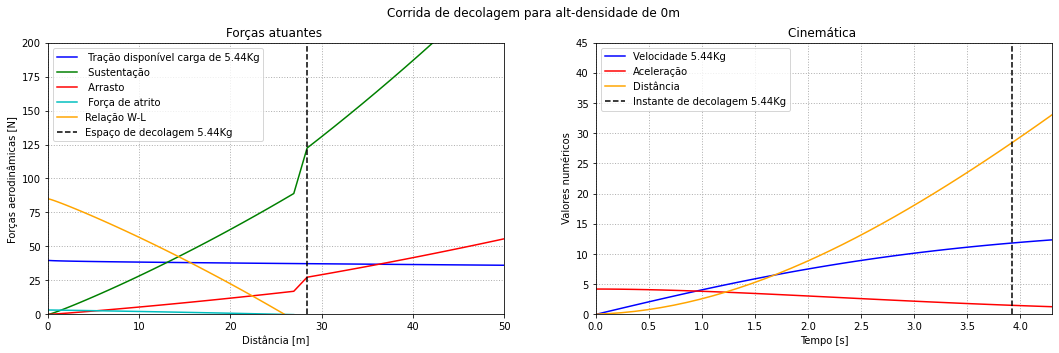

In [29]:
"""
Created on Thu Mar 25 11:46:23 2021

@author: Arthur Chabole
=============================
Este programa cálcula a forças e a cinemática da decolagem para alt-dens 1212m usando a biblioteca zerbralib. 
   
 Figura 1 - Aplicando newton na decolagem para 2 cargas pagas diferentes
        Subplot 1 - Forças durante a decolagem x distância de pista
        Subplot 2 - Velocidade, aceleração e distância x Tempo
        
PROBLEMA
    - Espaço de decolagem ..... 
"""

from ZebraLib.zebralib.zebraperformance import Airplane # Só a classe
from ZebraLib.zebralib import zebraperformance as zp    
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

Zb = Airplane(CLn=1.75, CLmax=2.26)
Zb2 = Airplane(S=0.938, Af=0.8, CLmax= 1.523, CLn=1.061)


Dens = 1.225   #Densidade do ar

#Metodos para dinamica de de colagem
Vlo_index, V, T, L, D, Fat = Zb.takeOff_Forces(Dens)

# Métodos para cinemática de decolagem
t, d, V, a = Zb.takeOff_Kinematic_EDO(6, Dens)

#PLOTAGEM
fig, ax = plt.subplots(figsize=(18, 5),nrows=1, ncols=2)
fig.suptitle(f'Corrida de decolagem para alt-densidade de {round(zp.alt2rho(rho=Dens))}m')

#CONSTRUINDO O 1 SUBGRÁFICO   
ax[0].set(title= 'Forças atuantes ', xlabel='Distância [m]',ylabel='Forças aerodinâmicas [N]')
     
#Plotando os dados para o avião Zb1
ax[0].plot(d, T, color='b', label = f' Tração disponível carga de {Zb.Load}Kg')
ax[0].plot(d, L, color= 'g',label = ' Sustentação')
ax[0].plot(d, D, color='r',label = ' Arrasto')
ax[0].plot(d, Fat, color='c', label = ' Força de atrito ')
ax[0].plot(d, Fat/Zb.mi, color='orange' , label = 'Relação W-L ') #Gambiarra para poupar trabalho "Fat/Zb.mi"

ax[0].plot([d[Vlo_index]]*2, [0,250], '--', color='black' , label = f'Espaço de decolagem {Zb.Load}Kg')

ax[0].set_ylim(0, 200)
ax[0].set_xlim(0, 50)
ax[0].legend()
ax[0].grid(linestyle='dotted', linewidth=1)

#CONSTRUINDO O 2 SUBGRÁFICO
ax[1].set(title= 'Cinemática ',xlabel='Tempo [s]', ylabel=' Valores numéricos')

#Plotando os dados para o avião Zb1
ax[1].plot(t, V, color='b', label = f'Velocidade {Zb.Load}Kg')
ax[1].plot(t, a, color='r', label = 'Aceleração')
ax[1].plot(t, d, color='orange', label = 'Distância')

ax[1].plot([t[Vlo_index]]*2, [0,45], '--', color='black' , label = f'Instante de decolagem {Zb.Load}Kg')

ax[1].set_ylim(0,45)
ax[1].set_xlim(0, 4.3)

ax[1].legend()
ax[1].grid(linestyle='dotted', linewidth=1)

## Performance de decolagem - Alt-Dens x Distância

0.01734754068408905
0.01734754068408905
0.01734754068408905
0.01734754068408905


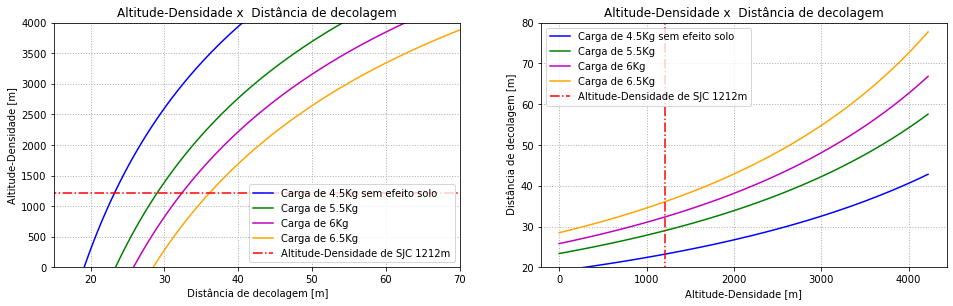

In [10]:
'''
Este programa calcula o comprimento de pista para decolagem x altitude-densidade para varias cargas pagas
                                                                            usando a biblioteca zebralib.    
    Figura 1 - Altitude-densidade x Distância de pista
            Com cargas diferentes.
      
    Figura 2 - Distância de pista x Altitude-densidade 
            Com cargas diferentes.
            
O efeito solo pode ser considerado ou não. Caso seja considerado, "descomente" as linhas 60-63 e 84-87
'''

from ZebraLib.zebralib.zebraperformance import Airplane # Só a classe
from ZebraLib.zebralib import zebraperformance as zp    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Zb = Airplane(CLn=1.75, CLmax=2.26, Load=4.5)
Zb2 = Airplane(CLn=1.75, CLmax=2.26, Load=5.5)
Zb3 = Airplane(CLn=1.75, CLmax=2.26, Load=6)                #Constroi os objetos
Zb4 = Airplane(CLn=1.75, CLmax=2.26, Load=6.5)

Densidade = np.linspace(1.225, 0.8) 
AltDens = zp.iterate_rho2alt(Densidade)

# Sem considerar o efeito solo 'False'
Slo =  np.array(Zb.takeOff_Distance_AproxAnderson(Densidade, False))
Slo2 = np.array(Zb2.takeOff_Distance_AproxAnderson(Densidade, False))
Slo3 = np.array(Zb3.takeOff_Distance_AproxAnderson(Densidade, False))
Slo4 = np.array(Zb4.takeOff_Distance_AproxAnderson(Densidade, False))

# Considerando o efeito solo do avião 'True'
S =  np.array(Zb.takeOff_Distance_AproxAnderson(Densidade, True))
S2 = np.array(Zb2.takeOff_Distance_AproxAnderson(Densidade, True))
S3 = np.array(Zb3.takeOff_Distance_AproxAnderson(Densidade, True))
S4 = np.array(Zb4.takeOff_Distance_AproxAnderson(Densidade, True))

#PLOTAGEM
fig, ax = plt.subplots(figsize=(16, 4.5),nrows=1, ncols=2)
#fig, ax2 = plt.subplots()

#INSPIRADO NA AIRBUS
ax[0].set(title='Altitude-Densidade x  Distância de decolagem', xlabel=' Distância de decolagem [m]',
          ylabel='Altitude-Densidade [m]', label=' - Sem efeito solo e -- com efeito solo')

# Sem considerar o efeito solo 'False'
ax[0].plot(Slo, AltDens, color= 'b',  label= f'Carga de {round(Zb.Load,2)}Kg sem efeito solo' )
ax[0].plot(Slo2, AltDens, color='g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[0].plot(Slo3, AltDens, color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
ax[0].plot(Slo4, AltDens, color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg')

# Considerando o efeito solo do avião 'True'
# ax.plot(S, AltDens, '--', color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg com efeito solo' )
# ax.plot(S2, AltDens, '--', color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg ')
# ax.plot(S3, AltDens, '--', color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
# ax.plot(S4, AltDens, '--', color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg ')

ax[0].plot([-5,180], [1212]*2,  linestyle='dashdot', color= 'r', label= 'Altitude-Densidade de SJC 1212m' )

ax[0].set_ylim(0, 4000)
ax[0].set_xlim(15,70)

ax[0].legend()
ax[0].grid(linestyle='dotted', linewidth=1)

#INSPIRADO NA EMBRAER
ax[1].set(title='Altitude-Densidade x  Distância de decolagem', ylabel=' Distância de decolagem [m]',
          xlabel='Altitude-Densidade [m]')

# Sem considerar o efeito solo 'False'
ax[1].plot(AltDens, Slo, color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg sem efeito solo')
ax[1].plot(AltDens, Slo2, color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[1].plot(AltDens, Slo3, color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg')
ax[1].plot(AltDens, Slo4, color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg')

# Considerando o efeito solo do avião 'True'
# ax2.plot(AltDens, S , '--', color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg com efeito solo')
# ax2.plot(AltDens, S2, '--', color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg')
# ax2.plot(AltDens, S3,  '--', color= 'm', label= f'Carga de {round(Zb2.Load,2)}Kg')
# ax2.plot(AltDens, S4, '--', color= 'orange', label= f'Carga de {round(Zb2.Load,2)}Kg')

ax[1].plot([1212]*2, [0,280], linestyle='dashdot', color= 'r', label= 'Altitude-Densidade de SJC 1212m' )

ax[1].set_ylim(20,80)

ax[1].legend()
ax[1].grid(linestyle='dotted', linewidth=1)
plt.show()

## Performance de decolagem: MTOW x distância de decolagem

0.01734754068408905
0.01734754068408905
0.01734754068408905
0.01734754068408905
0.01734754068408905
0.01734754068408905


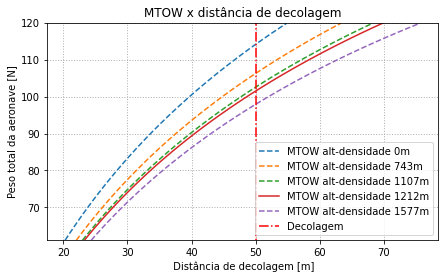

In [24]:
"""
Created on Thu Feb  4 18:42:36 2021

@author: Arthur Chabole
===============================
Este programa calcula o MTOW x comprimento de pista para varias alt-dens usando a biblioteca zebralib.
                                                                                
    Figura 1 - Peso total (MTOW) x Distância de pista
            Com alt-dens diferentes.
      
    Figura 2 - Distância de pista x Peso total (MTOW)
            Com alt-dens diferentes.
            
O efeito solo pode ser considerado ou não. Caso seja considerado, coloque "True" linhas 30-34
"""
from ZebraLib.zebralib.zebraperformance import Airplane # Só a classe
from ZebraLib.zebralib import zebraperformance as zp    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

g= 9.81

Zb = Airplane(CLn=1.75, CLmax=2.26)
Cargas = np.linspace(3, 9)

# Chamando a função da biblioteca de desemenho pelo nome apelido zp
Slo, W = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.22475, False)
Slo2, W2 = zp.takeOff_Distance_x_PayLoad(Zb,Cargas, 1.14, False)
Slo3, W3 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.10, False)
Slo4, W4 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.08865, False)
Slo5, W5 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.05, False)

#2x PLOTAGENS
fig, ax = plt.subplots(figsize=(7, 4))
#fig, ax2 = plt.subplots()

#INSPIRADO NA AIRBUS
ax.set(title='MTOW x distância de decolagem', xlabel=' Distância de decolagem [m]',
          ylabel='Peso total da aeronave [N]')

ax.plot(Slo,W, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.224975))}m')
ax.plot(Slo2,W, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.14))}m')
ax.plot(Slo3,W, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.1))}m')
ax.plot(Slo4,W, label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.08865))}m')
ax.plot(Slo5,W, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.05))}m')
ax.plot([50]*2, [0,150],  linestyle='dashdot', color='r', label= 'Decolagem')

ax.set_ylim(W[0],120)

ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

# #INSPIRADO NA BOING
# ax2.set(title='MTOW x distância de decolagem', ylabel=' Distância de decolagem [m]',
#           xlabel='Peso total da aeronave [N]')

# ax2.plot(W, Slo, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.224975))}m')
# ax2.plot(W, Slo2, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.14))}m')
# ax2.plot(W, Slo3, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.1))}m')
# ax2.plot(W, Slo4,  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.08865))}m')
# ax2.plot(W, Slo5, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.05))}m')
# ax2.plot([W[0],100],[50]*2 , linestyle='dashdot', color='r', label= 'Decolagem')

# ax2.set_xlim(W[0],100)

# ax2.legend()
# ax.grid(linestyle='dotted', linewidth=1)



# Subida


0.01734754068408905
0.01734754068408905
0.01734754068408905


C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1431: RuntimeWarning: invalid value encountered in arcsin
  theta = np.degrees(np.arcsin(RC / V))
C:\Users\arthu\Anaconda3\ZebraLib\

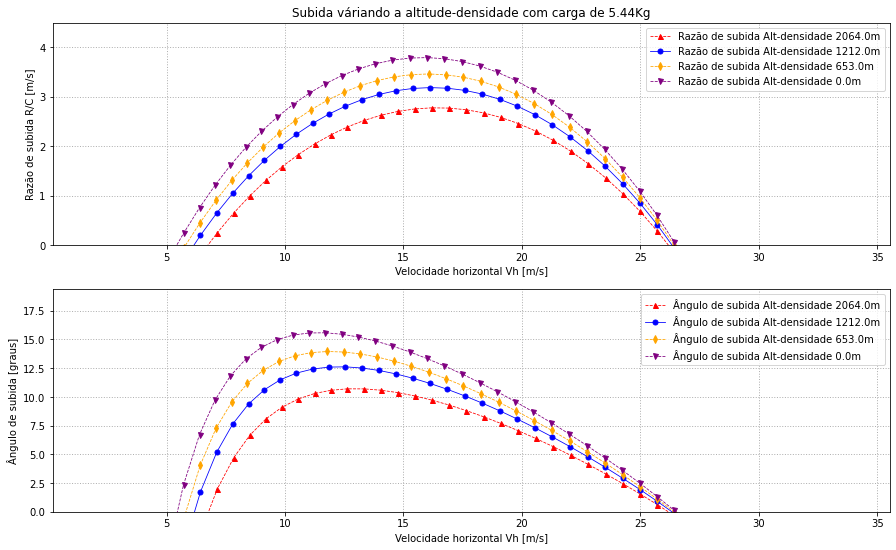

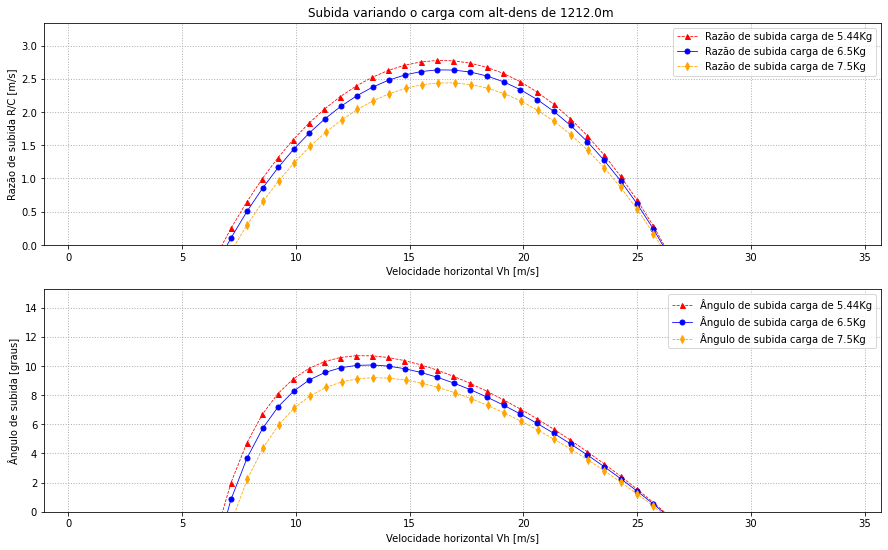

In [14]:
"""
Created on Fri Apr  2 22:48:14 2021

@author: Arthur Chabole
=============================
Este programa cálcula a razão e ângulo de subida x velocidade horizontal Vh usando a biblioteca zerbralib. 
   
 Figura 1 - Fixo a carga padrão de 5.44kg
        Subplot 1 - Razão de subida x Vh variando altitude-densidade
        Subplot 2 - Ângulo de subida x Vh variando altitude-densidade
   
 Figura 2 - Fixo a altitude-densidade de 1212m
        Subplot 1 - Razão de subida x Vh variando carga paga
        Subplot 2 - Ângulo de subida x Vh variando carga paga
        
"""

from ZebraLib.zebralib import zebraperformance as zp    
import numpy as np
import matplotlib.pyplot as plt
import time 

Zb1 = zp.Airplane(CLn=1.061, CLmax=1.523)
Zb2 = zp.Airplane(CLn=1.061, CLmax=1.523, Load= 6.5)  #Constrói os objetos
Zb3 = zp.Airplane(CLn=1.061, CLmax=1.523, Load= 7.5)

Zbs = np.array((Zb1, Zb2, Zb3))  #Array de objetos

V = np.linspace(0.007,35)
Densidade = [1, 1.0887, 1.15, 1.224978]

Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen' ))
Markers= np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--','-','--','--'))


# ===================================              FIGURA 1        ========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida váriando a altitude-densidade com carga de {Zb1.Load}Kg', xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line) in zip(Densidade, Cores, Markers, Lines):
    RC, theta = Zb1.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)   #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
            label= f'Razão de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )

ax.set_ylim(0)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)
ax2.set_ylim(0)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

# ===================================             FIGURA 2           ==========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida variando o carga com alt-dens de {round(zp.alt2rho(rho= Densidade[1]),0)}m ',
        xlabel='Velocidade horizontal Vh [m/s]', ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, zb) in zip(Densidade, Cores, Markers, Lines, Zbs):
    RC, theta = zb.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)  #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
             label= f'Razão de subida carga de {(zb.Load)}Kg' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida carga de {(zb.Load)}Kg' )

ax.set_ylim(0)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)